## Reuters corpus visualization data processing and exploration

In this notebook I continue processing the CSV that was created with reuters-load.ipynb.

In [2]:
import pandas as pd

In [10]:
import re
WS_REMOVAL = re.compile(r"\s+")

In [5]:
reuters = pd.read_csv('csv/reuters.csv', delimiter=';')
reuters

,id,date,location,country,codes,desc,headline,text,essential
0,635751,1997-06-04,NaN,EU,"['G15', 'GCAT']","['EUROPEAN COMMUNITY', 'GOVERNMENT/SOCIAL']",Official Journal contents - OJ C 169 of June 4...,* (Note - contents are displayed in reverse or...,Note 3 ) June ARTICLE Journal communication 2 ...
1,635752,1997-06-04,NaN,EU,"['G15', 'GCAT']","['EUROPEAN COMMUNITY', 'GOVERNMENT/SOCIAL']",Official Journal contents - OJ L 144 of June 4...,* (Note - contents are displayed in reverse or...,Committee 29 system fruit opening Republic OJ ...
2,635753,1997-06-04,NaN,CANADA,"['M14', 'M143', 'MCAT']","['COMMODITY MARKETS', 'ENERGY MARKETS', 'MARKE...",Suncor lowers Canada heavy oil price.,COMPANY\t EFF DATE BOW RIVER HARDISTY ...,130.00 ) BOW lower 24.9 HARDISTY KOCH MEDIUM h...
3,635754,1997-06-04,NaN,CANADA,"['M14', 'M143', 'MCAT']","['COMMODITY MARKETS', 'ENERGY MARKETS', 'MARKE...",Suncor cuts Canada light oil prices.,COMPANY\t EFF DATE\tLT SWEET\t\tLT SOUR \t\t\t...,........... sour 1.1 KOCH Light COMPANY .... 1...
4,635755,1997-06-04,TORONTO,CANADA,"['M11', 'MCAT']","['EQUITY MARKETS', 'MARKETS']","Toronto stocks end softer, more consolidation ...",CHANGE\t\t\t\t CHANGE TSE\t 6428.62 -4.1...,-0.15 unchanged 1.54 NICKEL 485 slipped NY-COM...
...,...,...,...,...,...,...,...,...,...
299768,771562,1997-07-31,NaN,FRANCE,"['C32', 'CCAT']","['ADVERTISING/PROMOTION', 'CORPORATE/INDUSTRIAL']",Reuters French Advertising & Media Digest -Jul...,----------------- FAM ------------------- REUT...,Fax News channel child FAM Adverising TV weekl...
299769,771563,1997-07-31,PARIS,FRANCE,['C152'],['COMMENT/FORECASTS'],Fleming issues buy recommendation on M6.,Fleming Securities said it recommends shares i...,objective high full TV 25 rose newsroom tradin...
299770,771564,1997-07-31,BEIJING,CHINA,"['GCAT', 'GSCI']","['GOVERNMENT/SOCIAL', 'SCIENCE AND TECHNOLOGY']",China to launch Internet service for science d...,A Chinese scientific institute will launch soo...,http 1921 Internet magazine February official ...
299771,771565,1997-07-31,NaN,GERMANY,"['C32', 'CCAT']","['ADVERTISING/PROMOTION', 'CORPORATE/INDUSTRIAL']",Reuters German Advertising & Media Digest -Jul...,-------------- GAM -------------------- REUTER...,based without News Sueddeutsche child channel ...


In [8]:
reuters_by_id = reuters.set_index('id')
reuters_by_id

,date,location,country,codes,desc,headline,text,essential
id,,,,,,,,
635751,1997-06-04,NaN,EU,"['G15', 'GCAT']","['EUROPEAN COMMUNITY', 'GOVERNMENT/SOCIAL']",Official Journal contents - OJ C 169 of June 4...,* (Note - contents are displayed in reverse or...,Note 3 ) June ARTICLE Journal communication 2 ...
635752,1997-06-04,NaN,EU,"['G15', 'GCAT']","['EUROPEAN COMMUNITY', 'GOVERNMENT/SOCIAL']",Official Journal contents - OJ L 144 of June 4...,* (Note - contents are displayed in reverse or...,Committee 29 system fruit opening Republic OJ ...
635753,1997-06-04,NaN,CANADA,"['M14', 'M143', 'MCAT']","['COMMODITY MARKETS', 'ENERGY MARKETS', 'MARKE...",Suncor lowers Canada heavy oil price.,COMPANY\t EFF DATE BOW RIVER HARDISTY ...,130.00 ) BOW lower 24.9 HARDISTY KOCH MEDIUM h...
635754,1997-06-04,NaN,CANADA,"['M14', 'M143', 'MCAT']","['COMMODITY MARKETS', 'ENERGY MARKETS', 'MARKE...",Suncor cuts Canada light oil prices.,COMPANY\t EFF DATE\tLT SWEET\t\tLT SOUR \t\t\t...,........... sour 1.1 KOCH Light COMPANY .... 1...
635755,1997-06-04,TORONTO,CANADA,"['M11', 'MCAT']","['EQUITY MARKETS', 'MARKETS']","Toronto stocks end softer, more consolidation ...",CHANGE\t\t\t\t CHANGE TSE\t 6428.62 -4.1...,-0.15 unchanged 1.54 NICKEL 485 slipped NY-COM...
...,...,...,...,...,...,...,...,...
771562,1997-07-31,NaN,FRANCE,"['C32', 'CCAT']","['ADVERTISING/PROMOTION', 'CORPORATE/INDUSTRIAL']",Reuters French Advertising & Media Digest -Jul...,----------------- FAM ------------------- REUT...,Fax News channel child FAM Adverising TV weekl...
771563,1997-07-31,PARIS,FRANCE,['C152'],['COMMENT/FORECASTS'],Fleming issues buy recommendation on M6.,Fleming Securities said it recommends shares i...,objective high full TV 25 rose newsroom tradin...
771564,1997-07-31,BEIJING,CHINA,"['GCAT', 'GSCI']","['GOVERNMENT/SOCIAL', 'SCIENCE AND TECHNOLOGY']",China to launch Internet service for science d...,A Chinese scientific institute will launch soo...,http 1921 Internet magazine February official ...


In [13]:
reuters_by_id.describe()

,date,location,country,codes,desc,headline,text,essential
count,299773,281009,299771,299773,299773,299767,299772,299773
unique,127,5802,225,8326,8326,274873,294893,296263
top,1997-05-23,LONDON,USA,"['C15', 'C151', 'CCAT']","['PERFORMANCE', 'ACCOUNTS/EARNINGS', 'CORPORAT...",GOVERNMENT LIST.,The Belgian central bank said in its daily int...,Fax 6810 2 emergency government unchanged The ...
freq,3968,26792,90118,22203,22203,297,58,56


In [14]:
reuters_by_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299773 entries, 635751 to 771566
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       299773 non-null  object
 1   location   281009 non-null  object
 2   country    299771 non-null  object
 3   codes      299773 non-null  object
 4   desc       299773 non-null  object
 5   headline   299767 non-null  object
 6   text       299772 non-null  object
 7   essential  299773 non-null  object
dtypes: object(8)
memory usage: 20.6+ MB


In [15]:
reuters_by_id.fillna('', inplace=True)
reuters_by_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299773 entries, 635751 to 771566
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       299773 non-null  object
 1   location   299773 non-null  object
 2   country    299773 non-null  object
 3   codes      299773 non-null  object
 4   desc       299773 non-null  object
 5   headline   299773 non-null  object
 6   text       299773 non-null  object
 7   essential  299773 non-null  object
dtypes: object(8)
memory usage: 20.6+ MB


In [11]:
def remove_extra_white(s):    
    stripped = WS_REMOVAL.sub(' ', s).strip()
    return stripped

In [16]:
# remove extra white spaces from the headlines
reuters_by_id['headline'] = reuters_by_id['headline'].apply(lambda x: remove_extra_white(x))

In [17]:
reuters_by_id

,date,location,country,codes,desc,headline,text,essential
id,,,,,,,,
635751,1997-06-04,,EU,"['G15', 'GCAT']","['EUROPEAN COMMUNITY', 'GOVERNMENT/SOCIAL']",Official Journal contents - OJ C 169 of June 4...,* (Note - contents are displayed in reverse or...,Note 3 ) June ARTICLE Journal communication 2 ...
635752,1997-06-04,,EU,"['G15', 'GCAT']","['EUROPEAN COMMUNITY', 'GOVERNMENT/SOCIAL']",Official Journal contents - OJ L 144 of June 4...,* (Note - contents are displayed in reverse or...,Committee 29 system fruit opening Republic OJ ...
635753,1997-06-04,,CANADA,"['M14', 'M143', 'MCAT']","['COMMODITY MARKETS', 'ENERGY MARKETS', 'MARKE...",Suncor lowers Canada heavy oil price.,COMPANY\t EFF DATE BOW RIVER HARDISTY ...,130.00 ) BOW lower 24.9 HARDISTY KOCH MEDIUM h...
635754,1997-06-04,,CANADA,"['M14', 'M143', 'MCAT']","['COMMODITY MARKETS', 'ENERGY MARKETS', 'MARKE...",Suncor cuts Canada light oil prices.,COMPANY\t EFF DATE\tLT SWEET\t\tLT SOUR \t\t\t...,........... sour 1.1 KOCH Light COMPANY .... 1...
635755,1997-06-04,TORONTO,CANADA,"['M11', 'MCAT']","['EQUITY MARKETS', 'MARKETS']","Toronto stocks end softer, more consolidation ...",CHANGE\t\t\t\t CHANGE TSE\t 6428.62 -4.1...,-0.15 unchanged 1.54 NICKEL 485 slipped NY-COM...
...,...,...,...,...,...,...,...,...
771562,1997-07-31,,FRANCE,"['C32', 'CCAT']","['ADVERTISING/PROMOTION', 'CORPORATE/INDUSTRIAL']",Reuters French Advertising & Media Digest -Jul...,----------------- FAM ------------------- REUT...,Fax News channel child FAM Adverising TV weekl...
771563,1997-07-31,PARIS,FRANCE,['C152'],['COMMENT/FORECASTS'],Fleming issues buy recommendation on M6.,Fleming Securities said it recommends shares i...,objective high full TV 25 rose newsroom tradin...
771564,1997-07-31,BEIJING,CHINA,"['GCAT', 'GSCI']","['GOVERNMENT/SOCIAL', 'SCIENCE AND TECHNOLOGY']",China to launch Internet service for science d...,A Chinese scientific institute will launch soo...,http 1921 Internet magazine February official ...


In [18]:
print(reuters_by_id.loc[635754, 'headline'])

Suncor cuts Canada light oil prices.


In [19]:
print(reuters_by_id.loc[635754, 'text'])

COMPANY	 EFF DATE	LT SWEET		LT SOUR 				CDLR/BBL CDLR/M3   CDLR/BBL   CDLR/M3 IMPERIAL OIL  06/04/97   27.19  171.00	25.44     160.00 SHELL CANADA  06/03/97   27.35  172.00	25.76     162.00 SUNCOR*	 06/04/97   27.03  170.00	25.44     160.00 PETRO-CANADA  06/03/97   27.19  171.00	25.44     160.00 KOCH OIL	06/03/97   27.35  172.00	25.91     163.00 Light sweet marker crude  at Edmonton/Swan Hills......40 API, 0.3 pct sulphur Light sour at Cromer, Man....33 API, 1.1 pct sulphur *Suncor light sour...........35 API, 1.2 pct sulphur 


In [20]:
print(reuters_by_id.loc[635754, 'essential'])

........... sour 1.1 KOCH Light COMPANY .... 170.00 EFF CANADA Hills OIL , 06/04/97 171.00 DATE SHELL CDLR/M3 25.44 ...... . 0.3 light Edmonton/Swan marker pct Canada 160.00 API 35 25.91 PETRO-CANADA 163.00 27.19 SWEET IMPERIAL 40 oil 33 CDLR/BBL SOUR SUNCOR LT Cromer 27.35 cut sweet 162.00 price * Suncor crude 27.03 06/03/97 172.00 25.76 1.2 Man sulphur


### Exploring topic combination frequencies

In [21]:
desc_freqs = reuters_by_id['desc'].value_counts()
desc_freqs

['PERFORMANCE', 'ACCOUNTS/EARNINGS', 'CORPORATE/INDUSTRIAL']                                                                                                                                                         22203
['PERFORMANCE', 'COMMENT/FORECASTS', 'CORPORATE/INDUSTRIAL']                                                                                                                                                         19751
['EQUITY MARKETS', 'MARKETS']                                                                                                                                                                                        15791
['COMMODITY MARKETS', 'SOFT COMMODITIES', 'MARKETS']                                                                                                                                                                 14675
['GOVERNMENT/SOCIAL', 'SPORTS']                                                                                             

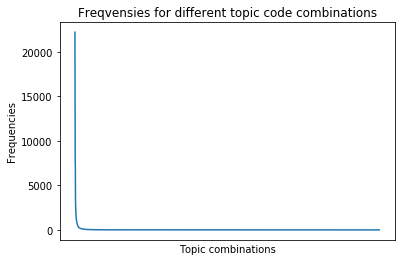

In [26]:
import matplotlib.pyplot as plt

# There are 4596 combinations in total
plt.figure()
desc_freqs.plot()
plt.title("Freqvensies for different topic code combinations")
plt.xlabel("Topic combinations")
plt.ylabel("Frequencies")
#plt.axis('off')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.show()

### Exploring single topic frequencies

In [28]:
# function to explore the amounts of single topics, return a sorted dictionary

def desc_amount_check(data):
    desc_amount_dict = {}
    for index, desc_list in data['desc'].iteritems():
        for desc in desc_list:
            if desc_amount_dict.get(desc) == None:
                desc_amount_dict[desc] = 1
            else: 
                desc_amount_dict[desc] += 1
                
    sorted_desc_amounts = dict(sorted(desc_amount_dict.items(), key=lambda item: item[1]))            
    return sorted_desc_amounts  

In [32]:
# change desc and codes columns to lists (were strings)
reuters_by_id['desc'] = reuters_by_id['desc'].apply(eval)
reuters_by_id['codes'] = reuters_by_id['codes'].apply(eval)

In [34]:
large_desc_amount_dict = desc_amount_check(reuters_by_id)
large_desc_amount_dict

{'MILLENNIUM ISSUES': 4,
 'EC GENERAL': 8,
 'CAPACITY UTILIZATION': 19,
 'INVENTORIES': 38,
 'EC ENVIRONMENT ISSUES': 55,
 'CONSUMER CREDIT': 70,
 'HOUSING STARTS': 122,
 'FASHION': 141,
 'PERSONAL INCOME': 162,
 'TRAVEL AND TOURISM': 187,
 'OBITUARIES': 301,
 'WHOLESALE PRICES': 348,
 'MARKET SHARE': 381,
 'DEFENCE CONTRACTS': 401,
 'RETAIL SALES': 432,
 'INSOLVENCY/LIQUIDITY': 591,
 'INDUSTRIAL PRODUCTION': 619,
 'WELFARE, SOCIAL SERVICES': 664,
 'EC CORPORATE POLICY': 671,
 'EC INSTITUTIONS': 704,
 'MONEY SUPPLY': 747,
 'UNEMPLOYMENT': 760,
 'EC AGRICULTURE POLICY': 761,
 'CONSUMER FINANCE': 778,
 'EC COMPETITION/SUBSIDY': 801,
 'OUTPUT/CAPACITY': 857,
 'ADVERTISING/PROMOTION': 919,
 'BALANCE OF PAYMENTS': 949,
 'RESEARCH/DEVELOPMENT': 958,
 'HUMAN INTEREST': 975,
 'SCIENCE AND TECHNOLOGY': 989,
 'RELIGION': 989,
 'RESERVES': 1019,
 'LOANS/CREDITS': 1043,
 'EC INTERNAL MARKET': 1101,
 'ARTS, CULTURE, ENTERTAINMENT': 1310,
 'CREDIT RATINGS': 1358,
 'DOMESTIC MARKETS': 1423,
 'EC EXTE

In [37]:
topic_amount_df = pd.DataFrame.from_dict(large_desc_amount_dict,  orient='index')
topic_amount_df.reset_index(level=0, inplace=True)
topic_amount_df.rename(columns={0: "AMOUNT", "index": "DESC"}, inplace=True)
topic_amount_df

,DESC,AMOUNT
0,MILLENNIUM ISSUES,4
1,EC GENERAL,8
2,CAPACITY UTILIZATION,19
3,INVENTORIES,38
4,EC ENVIRONMENT ISSUES,55
...,...,...
98,ECONOMICS,42374
99,PERFORMANCE,59207
100,MARKETS,81940
101,GOVERNMENT/SOCIAL,82580


In [38]:
topics_desc_index = topic_amount_df.set_index('DESC')
topics_desc_index

,AMOUNT
DESC,
MILLENNIUM ISSUES,4
EC GENERAL,8
CAPACITY UTILIZATION,19
INVENTORIES,38
EC ENVIRONMENT ISSUES,55
...,...
ECONOMICS,42374
PERFORMANCE,59207
MARKETS,81940


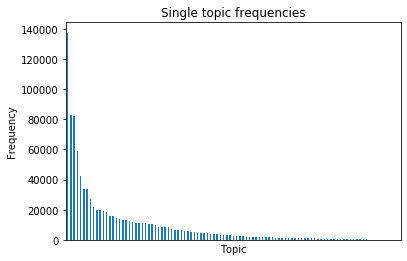

In [42]:
plt.figure()
topics_desc_index.sort_values(by="AMOUNT",ascending=False)["AMOUNT"].plot.bar()
plt.title("Single topic frequencies")
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.show()

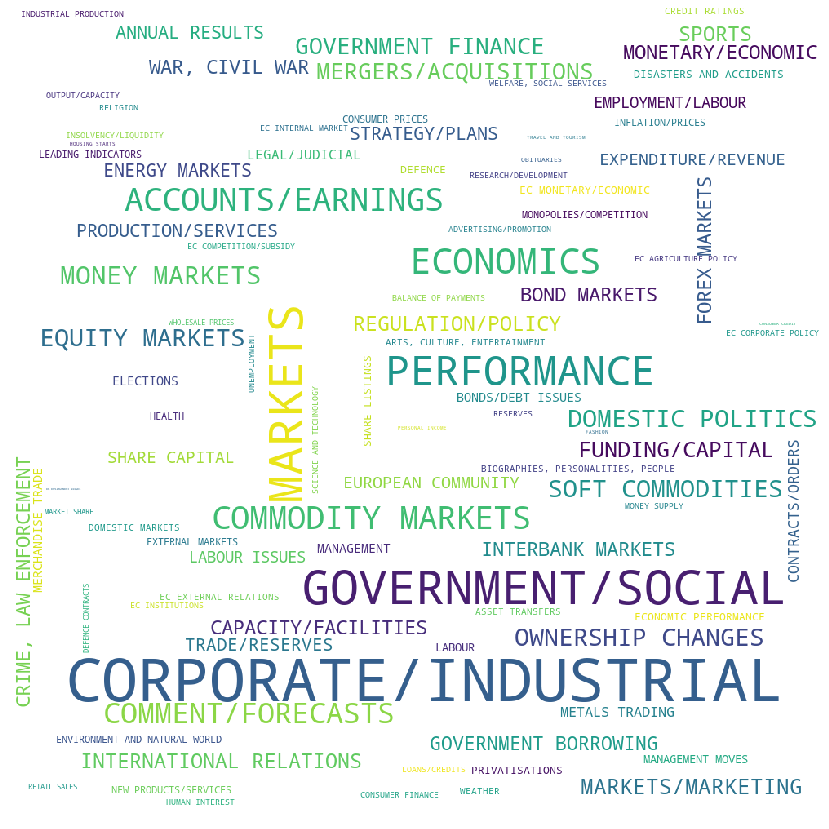

In [43]:
# wordcloud from single topic frequencies

from wordcloud import WordCloud

topic_cloud = WordCloud(background_color="white", width=1000, height=1000).generate_from_frequencies(large_desc_amount_dict)
plt.figure(figsize=(15,15))
plt.imshow(topic_cloud)
plt.axis("off")
plt.show()

### Let's explore locations

In [45]:
reuter_contry_loc = reuters_by_id.groupby(by=['country', 'location']).size()
reuter_contry_loc

country      location                       
                                                 1
             ASMARA                              1
ABU DHABI    ABU DHABI                          53
             ABU DHABI, United Arab Emirates     1
AFGHANISTAN                                      3
                                                ..
ZIMBABWE     HARARE, Zimbabwe                    4
             HHARARE                             1
             NYANGA, Zimbabwe                    2
             VICTORIA FALLS                      1
             VICTORIA FALLS, Zimbabwe            3
Length: 6111, dtype: int64

In [71]:
pd.set_option('display.max_rows', 226)
reuter_contries = reuters_by_id.groupby(by=['country']).size()
reuter_contries

country
                                     2
ABU DHABI                           54
AFGHANISTAN                        181
AFRICA                               4
ALBANIA                            632
ALGERIA                            109
ANDORRA                              8
ANGOLA                             163
ANTIGUA                             38
ANTIGUA AND BARBUDA                 12
ARGENTINA                         1859
ARMENIA                             25
AUSTRALIA                         8263
AUSTRIA                           1174
AZERBAIJAN                          61
BAHAMAS                              3
BAHRAIN                            421
BANGLADESH                         900
BARBADOS                            29
BELARUS                            133
BELGIUM                           4107
BENIN                                7
BERMUDA                             32
BOLIVIA                            142
BOSNIA                             398
BOSNIA-HERZEGOVIN

In [48]:
reuter_locations = reuters_by_id.groupby(by=['location']).size()
reuter_locations

location
                                18764
AACHEN, Germany                    19
AALST, Belgium                      1
AARAU, Switzerland                  2
ABBADIA SAN SALVATORE, Italy        1
                                ...  
ZUG, Switzerland                    7
ZURICH                           1137
ZURICH, Switzerland                16
ZVORNIK, Bosnia                     1
ZYWIEC, Poland                      2
Length: 5803, dtype: int64

In [50]:
reuters_df_loc_edited = reuters_by_id.copy(deep=True)

In [51]:
reuters_df_loc_edited['location'] = reuters_df_loc_edited['location'].apply(lambda x: x.split(',')[0])
reuters_df_loc_edited

,date,location,country,codes,desc,headline,text,essential
id,,,,,,,,
635751,1997-06-04,,EU,"[G15, GCAT]","[EUROPEAN COMMUNITY, GOVERNMENT/SOCIAL]",Official Journal contents - OJ C 169 of June 4...,* (Note - contents are displayed in reverse or...,Note 3 ) June ARTICLE Journal communication 2 ...
635752,1997-06-04,,EU,"[G15, GCAT]","[EUROPEAN COMMUNITY, GOVERNMENT/SOCIAL]",Official Journal contents - OJ L 144 of June 4...,* (Note - contents are displayed in reverse or...,Committee 29 system fruit opening Republic OJ ...
635753,1997-06-04,,CANADA,"[M14, M143, MCAT]","[COMMODITY MARKETS, ENERGY MARKETS, MARKETS]",Suncor lowers Canada heavy oil price.,COMPANY\t EFF DATE BOW RIVER HARDISTY ...,130.00 ) BOW lower 24.9 HARDISTY KOCH MEDIUM h...
635754,1997-06-04,,CANADA,"[M14, M143, MCAT]","[COMMODITY MARKETS, ENERGY MARKETS, MARKETS]",Suncor cuts Canada light oil prices.,COMPANY\t EFF DATE\tLT SWEET\t\tLT SOUR \t\t\t...,........... sour 1.1 KOCH Light COMPANY .... 1...
635755,1997-06-04,TORONTO,CANADA,"[M11, MCAT]","[EQUITY MARKETS, MARKETS]","Toronto stocks end softer, more consolidation ...",CHANGE\t\t\t\t CHANGE TSE\t 6428.62 -4.1...,-0.15 unchanged 1.54 NICKEL 485 slipped NY-COM...
...,...,...,...,...,...,...,...,...
771562,1997-07-31,,FRANCE,"[C32, CCAT]","[ADVERTISING/PROMOTION, CORPORATE/INDUSTRIAL]",Reuters French Advertising & Media Digest -Jul...,----------------- FAM ------------------- REUT...,Fax News channel child FAM Adverising TV weekl...
771563,1997-07-31,PARIS,FRANCE,[C152],[COMMENT/FORECASTS],Fleming issues buy recommendation on M6.,Fleming Securities said it recommends shares i...,objective high full TV 25 rose newsroom tradin...
771564,1997-07-31,BEIJING,CHINA,"[GCAT, GSCI]","[GOVERNMENT/SOCIAL, SCIENCE AND TECHNOLOGY]",China to launch Internet service for science d...,A Chinese scientific institute will launch soo...,http 1921 Internet magazine February official ...


In [52]:
reuter_locations = reuters_df_loc_edited.groupby(by=['location']).size()
reuter_locations

location
                         18764
AACHEN                      19
AALST                        1
AARAU                        2
ABBADIA SAN SALVATORE        1
                         ...  
ZOUTKLOOF                    1
ZUG                          7
ZURICH                    1153
ZVORNIK                      1
ZYWIEC                       2
Length: 4121, dtype: int64

In [54]:
reuter_contry_loc = reuters_df_loc_edited.groupby(by=['country', 'location']).size()
reuter_contry_loc

country      location      
                                 1
             ASMARA              1
ABU DHABI    ABU DHABI          54
AFGHANISTAN                      3
             ALMATY              1
                              ... 
ZIMBABWE                        17
             HARARE            640
             HHARARE             1
             NYANGA              2
             VICTORIA FALLS      4
Length: 4518, dtype: int64

In [57]:
# There is a typo in one of the locations
reuters_df_loc_edited['location'] =reuters_df_loc_edited['location'].replace('HHARARE', 'HARARE')

In [58]:
reuter_contry_loc = reuters_df_loc_edited.groupby(by=['country', 'location']).size()
reuter_contry_loc

country      location      
                                 1
             ASMARA              1
ABU DHABI    ABU DHABI          54
AFGHANISTAN                      3
             ALMATY              1
                              ... 
ZAMBIA       NDOLA               1
ZIMBABWE                        17
             HARARE            641
             NYANGA              2
             VICTORIA FALLS      4
Length: 4517, dtype: int64

In [59]:
reuters_df_loc_edited.to_csv(f'csv/reuters-cleaned.csv', index = False, sep = ';')

### Locations on map

Let's see what geopandas has to offer, and explore how we could show the location data on map.

In [60]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [67]:
pd.set_option('display.max_rows', 177)
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.00,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.00,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.00,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.00,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [95]:
world.rename(columns={'name': 'country'}, inplace=True)

In [97]:
world['country'] = world['country'].apply(lambda x: x.upper())
world

,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,920938,Oceania,FIJI,FJI,8374.00,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,TANZANIA,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. SAHARA,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,CANADA,CAN,1674000.00,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,UNITED STATES OF AMERICA,USA,18560000.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,KAZAKHSTAN,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,UZBEKISTAN,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,PAPUA NEW GUINEA,PNG,28020.00,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,INDONESIA,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,ARGENTINA,ARG,879400.00,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [107]:
world['country'] = world['country'].replace('BOSNIA AND HERZ.', 'BOSNIA')
world['country'] = world['country'].replace('MYANMAR', 'BURMA')
world['country'] = world['country'].replace('CENTRAL AFRICAN REP.', 'CENTRAL AFRICAN REPUBLIC')
world['country'] = world['country'].replace('CÔTE D\'IVOIRE', 'COTE D\'IVOIRE')
world['country'] = world['country'].replace('CZECHIA', 'CZECH REPUBLIC')
world['country'] = world['country'].replace('DEM. REP. CONGO', 'DEMOCRATIC REPUBLIC OF CONGO')
world['country'] = world['country'].replace('DOMINICAN REP.', 'DOMINICAN REPUBLIC')
world['country'] = world['country'].replace('TIMOR-LESTE', 'EAST TIMOR')
world['country'] = world['country'].replace('FALKLAND IS.', 'FALKLAND ISLANDS')
world['country'] = world['country'].replace('GUYANA', 'FRENCH GUIANA')
world['country'] = world['country'].replace('GUINEA-BISSAU', 'GUINEA BISSAU')
world['country'] = world['country'].replace('IRELAND', 'REPUBLIC OF IRELAND')
world['country'] = world['country'].replace('SOLOMON IS.', 'SOLOMON ISLANDS')
world['country'] = world['country'].replace('SURINAME', 'SURINAM')
world['country'] = world['country'].replace('UNITED ARAB EMIRATES', 'UAE')
world['country'] = world['country'].replace('UNITED KINGDOM', 'UK')
world['country'] = world['country'].replace('UNITED STATES OF AMERICA', 'USA')

In [62]:
cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


### Cleaning country and location data

In [64]:
reuters_df_loc_edited[reuters_df_loc_edited['country']== 'AFRICA']

,date,location,country,codes,desc,headline,text,essential
id,,,,,,,,
752299,1997-07-24,MONROVIA,AFRICA,"[GCAT, GPOL, GVOTE]","[GOVERNMENT/SOCIAL, DOMESTIC POLITICS, ELECTIONS]",Ex-warlord Taylor declared Liberia's new presi...,Former warlord Charles Taylor won election as ...,broadly chairman West vote seven told Thousand...
752300,1997-07-24,,AFRICA,"[C24, CCAT]","[CAPACITY/FACILITIES, CORPORATE/INDUSTRIAL]",Mideast and African port conditions - Lloyds.,Port conditions from Lloyds Shipping Intellige...,prospect Drydocks channel MOZAMBIQUE fruit Rad...
629034,1997-06-01,FREETOWN,AFRICA,"[GCAT, GPOL, GVIO]","[GOVERNMENT/SOCIAL, DOMESTIC POLITICS, WAR, CI...",S.LEONE COUP LEADER NAMES COUNCIL DESPITE DEAL...,Negotiators said on Sunday they had struck a d...,serious chairman Ertel West accused failing ve...
768742,1997-07-31,ABIDJAN,AFRICA,"[E51, E512, ECAT, GCAT, GDIP]","[TRADE/RESERVES, MERCHANDISE TRADE, ECONOMICS,...",Sierra Leone's neighbours to tighten blockade.,Envoys from Sierra Leone's West African neighb...,Envoys States Abacha appointed suspended attem...


In [65]:
reuters_df_loc_edited[reuters_df_loc_edited['country']== 'EU']

,date,location,country,codes,desc,headline,text,essential
id,,,,,,,,
635751,1997-06-04,,EU,"[G15, GCAT]","[EUROPEAN COMMUNITY, GOVERNMENT/SOCIAL]",Official Journal contents - OJ C 169 of June 4...,* (Note - contents are displayed in reverse or...,Note 3 ) June ARTICLE Journal communication 2 ...
635752,1997-06-04,,EU,"[G15, GCAT]","[EUROPEAN COMMUNITY, GOVERNMENT/SOCIAL]",Official Journal contents - OJ L 144 of June 4...,* (Note - contents are displayed in reverse or...,Committee 29 system fruit opening Republic OJ ...
637263,1997-06-04,BRUSSELS,EU,"[E12, ECAT, G15, G154, GCAT]","[MONETARY/ECONOMIC, ECONOMICS, EUROPEAN COMMUN...",EU finance ministers to meet on EMU on Sunday.,European Union finance ministers will meet for...,based appointed Luxembourg serious cocktail to...
774802,1997-08-04,,EU,"[G15, GCAT]","[EUROPEAN COMMUNITY, GOVERNMENT/SOCIAL]",Official Journal contents - OJ L 207 of August...,* COMMISSION DECISION of 1 July 1997 amending ...,States ) DECISION Journal EEA OJ amending draw...
774803,1997-08-04,,EU,"[G15, GCAT]","[EUROPEAN COMMUNITY, GOVERNMENT/SOCIAL]",Official Journal contents - OJ C 236 of August...,* (Note - contents are displayed in reverse or...,Note 236 ) June Journal monetary 2 RESOLUTION ...
...,...,...,...,...,...,...,...,...
495693,1997-04-09,,EU,"[G15, GCAT]","[EUROPEAN COMMUNITY, GOVERNMENT/SOCIAL]",OFFICIAL JOURNAL CONTENTS - OJ L 92 OF APRIL 7...,"* Decision No 3/96 of the Association Council,...",States Communities Euratom ) Republic OJ amend...
768181,1997-07-31,,EU,"[G15, GCAT]","[EUROPEAN COMMUNITY, GOVERNMENT/SOCIAL]",Official Journal contents - OJ L 202 of July 3...,* (Note - contents are displayed in reverse or...,States system 29 sixth fruit support provision...
768182,1997-07-31,,EU,"[G15, GCAT]","[EUROPEAN COMMUNITY, GOVERNMENT/SOCIAL]",Official Journal contents - OJ C 232 of July 3...,* (Note - contents are displayed in reverse or...,system Republic OJ operation IV/M.940 END Offi...


In [68]:
reuters_df_loc_edited[reuters_df_loc_edited['country']== '']

,date,location,country,codes,desc,headline,text,essential
id,,,,,,,,
703944,1997-07-02,,,[],[],,"LONDON, Reuter - Following are the buying and ...",sterling Marks ) Canadian Japanese 1.3805/10 g...
581999,1997-05-14,ASMARA,,"[GCAT, GVIO]","[GOVERNMENT/SOCIAL, WAR, CIVIL WAR]",Sudanese rebels say they capture Warab town.,Sudanese rebels said on Wednesday they had tak...,"prisoner 1,000 state northern 5.30 1530 govern..."


In [69]:
reuters_df_loc_edited[reuters_df_loc_edited['country']== 'UAE']

,date,location,country,codes,desc,headline,text,essential
id,,,,,,,,
479021,1997-04-01,DUBAI,UAE,"[GCAT, GCRIM]","[GOVERNMENT/SOCIAL, CRIME, LAW ENFORCEMENT]",Family of murdered Australian nurse reject mer...,The brother of an Australian nurse murdered in...,inconsistent denied Dhahran police withdrawn d...
491946,1997-04-07,SHARJAH,UAE,"[C21, C31, CCAT]","[PRODUCTION/SERVICES, MARKETS/MARKETING, CORPO...",EDI seen as vital tool for air cargo industry.,Electronic data interchange (EDI) is an essent...,printing Parcel 171 transportation dramatic se...
491975,1997-04-07,SHARJAH,UAE,"[C11, C24, CCAT]","[STRATEGY/PLANS, CAPACITY/FACILITIES, CORPORAT...",Electronic customs processing to boost efficie...,Global electronic customs processing is being ...,objective system 171 worldwide operation boost...
492616,1997-04-07,SHARJAH,UAE,"[C21, C31, CCAT]","[PRODUCTION/SERVICES, MARKETS/MARKETING, CORPO...","Airport must be conduit, less of cargo storage...",Airports have to rethink their role in air car...,based full 171 Doyle future comma Sunday philo...
492617,1997-04-07,SHARJAH,UAE,"[C21, C31, CCAT]","[PRODUCTION/SERVICES, MARKETS/MARKETING, CORPO...",Integrators seen leading in shipper satisfaction.,The traditional freight industry is failing to...,171 worldwide occasion lead Doyle failing told...
546851,1997-04-29,DUBAI,UAE,"[E51, E512, ECAT, G15, G158, GCAT, GDIP]","[TRADE/RESERVES, MERCHANDISE TRADE, ECONOMICS,...",EU shows it seeks to save Tehran ties - Iran a...,The European Union has shown it wants to save ...,10-member States based denied Luxembourg suspe...
803886,1997-08-15,DUBAI,UAE,"[GCAT, GVIO]","[GOVERNMENT/SOCIAL, WAR, CIVIL WAR]",Four of 10 Italians kidnapped in Yemen freed.,"Four Italian tourists, who were among 10 Itali...",poorest child freed seven told French diplomat...
489873,1997-04-06,SHARJAH,UAE,"[C15, C152, C31, CCAT]","[PERFORMANCE, COMMENT/FORECASTS, MARKETS/MARKE...",Air freight seen outpacing passenger traffic r...,Air freight growth will outpace passenger air ...,increasing dramatic 4.5 particularly marketing...
489875,1997-04-06,SHARJAH,UAE,"[C15, C152, C31, CCAT]","[PERFORMANCE, COMMENT/FORECASTS, MARKETS/MARKE...",Growth in global express services seen soaring.,The international express market is witnessing...,Parcel worldwide eastern marketing-cargo ... S...


In [87]:
reuters_df_loc_edited[reuters_df_loc_edited['country']== 'EASTERN EUROPE']

,date,location,country,codes,desc,headline,text,essential
id,,,,,,,,
581338,1997-05-13,,EASTERN EUROPE,"[C32, CCAT]","[ADVERTISING/PROMOTION, CORPORATE/INDUSTRIAL]",Emerging Europe Advertising & Media Digest - M...,REUTERS EMERGING EUROPE PRESS DIGEST FOR ADVER...,system 171 http chain Hungary April aimed copi...
780170,1997-08-05,,EASTERN EUROPE,"[C32, CCAT]","[ADVERTISING/PROMOTION, CORPORATE/INDUSTRIAL]",Emerging Europe Advertising & Media Digest-Aug 5.,REUTERS EMERGING EUROPE PRESS DIGEST FOR ADVER...,29 171 Anti-monopoly http Kulicka like Hungary...
619054,1997-05-27,,EASTERN EUROPE,"[C32, CCAT]","[ADVERTISING/PROMOTION, CORPORATE/INDUSTRIAL]",Emerging Europe Advertising & Media Digest - M...,REUTERS EMERGING EUROPE PRESS DIGEST FOR ADVER...,171 Carlsberg outlet operated Packaging http c...


In [70]:
# simple country fixes

reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('UNITED STATES', 'USA')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('UNITED ARAB EMIRATES', 'UAE')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('U S VIRGIN ISLANDS', 'VIRGIN ISLANDS')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('EUROPEAN UNION', 'EU')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('UNITED KINGDOM', 'UK')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('MACAO', 'MACAU')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('IVORY COAST', 'COTE D\'IVOIRE')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('HONGKONG', 'HONG KONG')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('ANTIGUA', 'ANTIGUA AND BARBUDA')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('BOSNIA-HERZEGOVINA', 'BOSNIA')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('COLUMBIA', 'COLOMBIA')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('SLOVAK REPUBLIC', 'SLOVAKIA')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('ST VINCENT AND THE GRENADINES', 'ST VINCENT')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('DUBAI', 'UAE')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('KROATIEN', 'CROATIA')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('FRENCH GUIANA', 'GUYANA')
reuters_df_loc_edited['country'] = reuters_df_loc_edited['country'].replace('IRELAND', 'REPUBLIC OF IRELAND')

In [89]:
# Fix 3 rows that have Africa as country, drop the one that has no location
reuters_df_loc_edited.loc[752299, 'country' ] = 'LIBERIA'
reuters_df_loc_edited.loc[629034, 'country' ] = 'SIERRA LEONE'
reuters_df_loc_edited.loc[768742, 'country' ] = 'COTE D\'IVOIRE'
reuters_df_loc_edited.drop(752300, inplace= True)

In [80]:
# Fix empty country row
reuters_df_loc_edited.loc[581999, 'country' ] = 'ERITREA'

In [84]:
# delete row 703944 that lacks country and topics
reuters_df_loc_edited.drop(703944, inplace= True)

In [129]:
#pd.set_option('display.max_rows', 226)
reuter_contries = reuters_df_loc_edited.groupby(by=['country']).size()
reuter_contries

country
ABU DHABI                          54
AFGHANISTAN                       181
ALBANIA                           632
ALGERIA                           109
ANDORRA                             8
ANGOLA                            163
ANTIGUA AND BARBUDA                50
ARGENTINA                        1859
ARMENIA                            25
AUSTRALIA                        8263
AUSTRIA                          1174
AZERBAIJAN                         61
BAHAMAS                             3
BAHRAIN                           421
BANGLADESH                        900
BARBADOS                           29
BELARUS                           133
BELGIUM                          4107
BENIN                               7
BERMUDA                            32
BOLIVIA                           142
BOSNIA                            399
BOTSWANA                          108
BRAZIL                           3160
BRUNEI                              9
BULGARIA                         1311
BURK

In [130]:
reuter_contries.describe()

count      207.000000
mean      1448.169082
std       6788.519818
min          1.000000
25%         21.000000
50%        107.000000
75%        889.000000
max      90119.000000
dtype: float64

In [131]:
country_df = reuter_contries.to_frame(name = 'count')
country_df

,count
country,
ABU DHABI,54
AFGHANISTAN,181
ALBANIA,632
ALGERIA,109
ANDORRA,8
ANGOLA,163
ANTIGUA AND BARBUDA,50
ARGENTINA,1859
ARMENIA,25


In [98]:
world['country']

0                          FIJI
1                      TANZANIA
2                     W. SAHARA
3                        CANADA
4      UNITED STATES OF AMERICA
5                    KAZAKHSTAN
6                    UZBEKISTAN
7              PAPUA NEW GUINEA
8                     INDONESIA
9                     ARGENTINA
10                        CHILE
11              DEM. REP. CONGO
12                      SOMALIA
13                        KENYA
14                        SUDAN
15                         CHAD
16                        HAITI
17               DOMINICAN REP.
18                       RUSSIA
19                      BAHAMAS
20                 FALKLAND IS.
21                       NORWAY
22                    GREENLAND
23       FR. S. ANTARCTIC LANDS
24                  TIMOR-LESTE
25                 SOUTH AFRICA
26                      LESOTHO
27                       MEXICO
28                      URUGUAY
29                       BRAZIL
30                      BOLIVIA
31      

In [136]:
reuters_geo = pd.merge(country_df, world, how='left', on='country')
reuters_geo 

,country,count,pop_est,continent,iso_a3,gdp_md_est,geometry
0,ABU DHABI,54,NaN,NaN,NaN,NaN,None
1,AFGHANISTAN,181,3.412481e+07,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
2,ALBANIA,632,3.047987e+06,Europe,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ALGERIA,109,4.096944e+07,Africa,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
4,ANDORRA,8,NaN,NaN,NaN,NaN,None
5,ANGOLA,163,2.931027e+07,Africa,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
6,ANTIGUA AND BARBUDA,50,NaN,NaN,NaN,NaN,None
7,ARGENTINA,1859,4.429329e+07,South America,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
8,ARMENIA,25,3.045191e+06,Asia,ARM,26300.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120..."
9,AUSTRALIA,8263,2.323241e+07,Oceania,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."


In [137]:
reutere_empty_coord = reuters_geo[reuters_geo['geometry'] == None]
reutere_empty_coord 

,country,count,pop_est,continent,iso_a3,gdp_md_est,geometry
0,ABU DHABI,54,NaN,NaN,NaN,NaN,None
4,ANDORRA,8,NaN,NaN,NaN,NaN,None
6,ANTIGUA AND BARBUDA,50,NaN,NaN,NaN,NaN,None
13,BAHRAIN,421,NaN,NaN,NaN,NaN,None
15,BARBADOS,29,NaN,NaN,NaN,NaN,None
19,BERMUDA,32,NaN,NaN,NaN,NaN,None
32,CAYMAN ISLANDS,19,NaN,NaN,NaN,NaN,None
38,COMOROS,35,NaN,NaN,NaN,NaN,None
40,COOK ISLANDS,1,NaN,NaN,NaN,NaN,None
52,EASTERN EUROPE,3,NaN,NaN,NaN,NaN,None


In [138]:
reutere_empty_coord.describe()

,count,pop_est,gdp_md_est
count,44.000000,0.0,0.0
mean,266.204545,NaN,NaN
std,846.784220,NaN,NaN
min,1.000000,NaN,NaN
25%,2.750000,NaN,NaN
50%,20.000000,NaN,NaN
75%,57.250000,NaN,NaN
max,4401.000000,NaN,NaN


### Combining map data and Reuters

After cleanup there still are 44 countries (or concepts like EU) that do not have corresponding row in world dataframe. I will anyway try out plotting something at this point to see how this approximately might look like


In [142]:
reuters_geo.rename(columns={'country': 'name'}, inplace=True)

In [144]:
from geopandas import GeoDataFrame

reuters_geo= GeoDataFrame(reuters_geo)


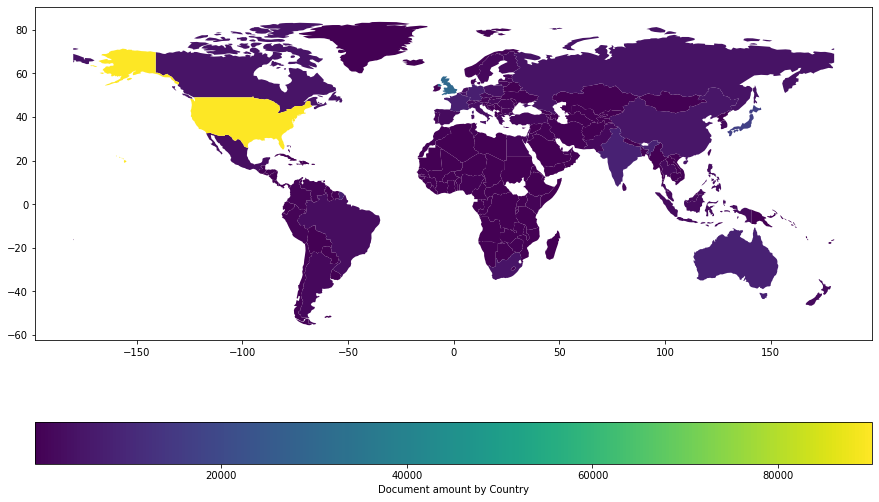

In [151]:
plt.rcParams['figure.figsize'] = [15, 10] # call this before subplot
fig, ax = plt.subplots(1, 1)

reuters_geo.plot(column='count', ax=ax,  legend=True,legend_kwds={'label': "Document amount by Country", 'orientation': "horizontal"})
plt.show()

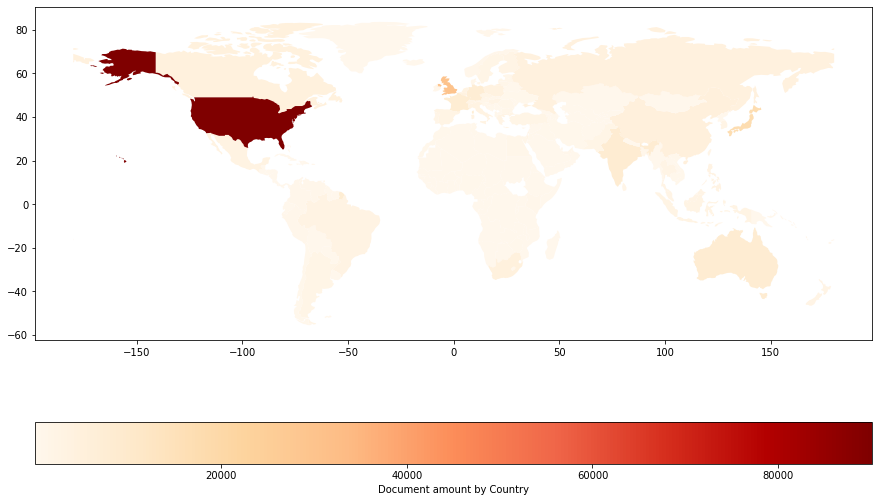

In [155]:
fig, ax = plt.subplots(1, 1)
reuters_geo.plot(column='count', cmap='OrRd', ax=ax, legend=True,legend_kwds={'label': "Document amount by Country", 'orientation': "horizontal"})


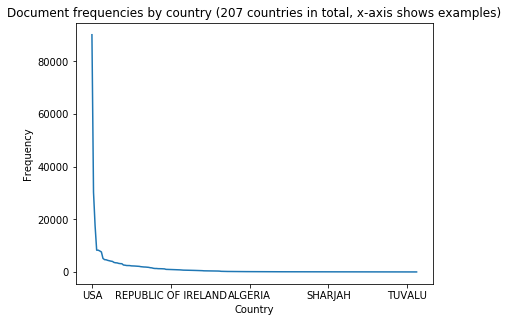

In [165]:
plt.rcParams['figure.figsize'] = [6.4, 4.8] # default size
plt.figure()
country_df.sort_values(by="count",ascending=False)["count"].plot()
plt.title("Document frequencies by country (207 countries in total, x-axis shows examples)")
plt.xlabel("Country")
plt.ylabel("Frequency")
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False)
plt.show()